# <font color='green'> Data Visualization </font>
# <font color='Blue'> Part Two </font>

## <font color='Blue'> Author Details </font>

In [3]:
from datetime import datetime

current_date_and_time = datetime.now()
date_and_time_in_text = current_date_and_time.strftime('%d/%m/%Y')

print('Created the day: ', date_and_time_in_text)
print('Author: Dr. Marcos A. Albarracin Manrique') 

Created the day:  01/09/2024
Author: Dr. Marcos A. Albarracin Manrique


## <font color='blue'> Description </font>

> We will model the data from the file 'GoalsInLeague.txt'. This file contains the results of a number of football matches from a certain football league. The first line of the file stores the number of goals scored by the home teams and the second line stores the number of goals scored by the visiting teams.

## <font color='blue'> Loading the Required Packages </font>

In [7]:
import matplotlib.pyplot as plt                    
from matplotlib.ticker import MultipleLocator      
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib widget

- **In case we want to customize the graphics, we can use 'style'.**

In [9]:
#print(plt.style.available) 
plt.style.use("Solarize_Light2")

## <font color='blue'> Opening, Reading, Formatting the File and Storing Data in Lists </font> 

In [11]:
with open("GoalsInLeague.txt", "r") as dataGoals:
    # First line
    TheHomeTeam = dataGoals.readline()
    TheHomeTeam = TheHomeTeam.strip(" \n") # Extra space + \n
    TheHomeTeam = TheHomeTeam.split(" ")

    TheHomeTeamGoals = [int(x) for x in TheHomeTeam]

    # Second Line
    TheVisitingTeam = dataGoals.readline()
    TheVisitingTeam = TheVisitingTeam.strip(" \n")
    TheVisitingTeam = TheVisitingTeam.split(" ")

    TheVisitingTeamGoals = [int(x) for x in TheVisitingTeam]

In [12]:
#print(TheHomeTeamGoals)
#print(TheVisitingTeamGoals)

## <font color='blue'> Line Plot </font>  

### <font color='red'> Creating a List with the Number of Data </font>   

In [15]:
xh = []
for i in range(1, len(TheHomeTeamGoals) + 1):
    xh.append(i)
#print(x)

xv = []
for i in range(1, len(TheVisitingTeamGoals) + 1):
    xv.append(i)

- **We customize the axes (locators and formatters of markers or ticks)).**

In [17]:
majorTickLocal = MultipleLocator(10)
minorTickLocal = MultipleLocator(2)
xMajorTickFormat = FormatStrFormatter("%3d")
yMajorTickFormat = FormatStrFormatter("%2d")

### <font color='red'> We Create the Plot Area Along with Our Custom Specifications </font>     

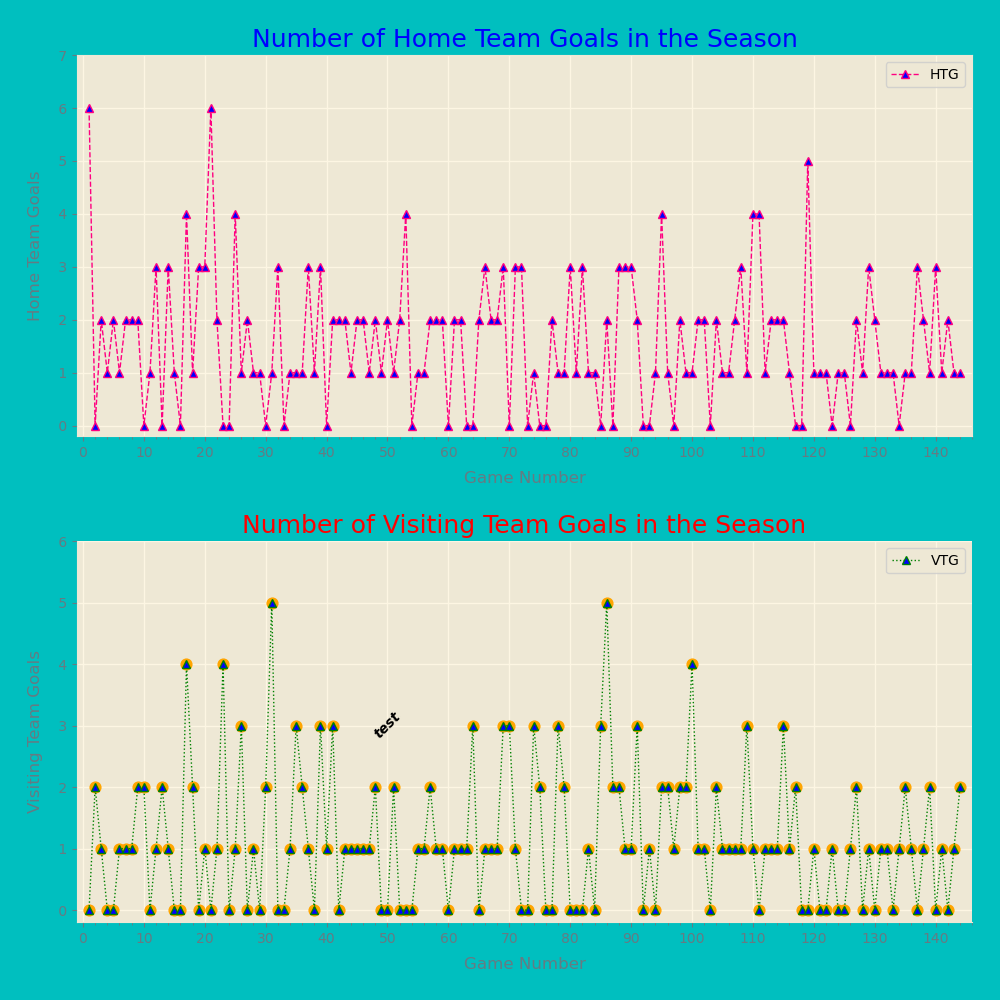

In [26]:
# Plot area definition.
fig = plt.figure("First", figsize = (10, 10), facecolor = 'c') #(width, height) 
ax1 = fig.add_subplot(2, 1, 1) 
ax2 = fig.add_subplot(2, 1, 2) 

# Chart features.
ax1.plot(xh, TheHomeTeamGoals, color = (1, 0, 0.5), marker = "^", 
         markerfacecolor = "blue", markersize = 6, linestyle = "--", 
         linewidth = 1, label = "HTG")
ax2.plot(xv, TheVisitingTeamGoals, color = "green", marker = "^", 
         markerfacecolor = "blue", markersize = 6, linestyle = ":", 
         linewidth = 1, label = "VTG")

ax2.scatter(xv, TheVisitingTeamGoals, color = "orange", s = 60)

# Axis domain.
#ax1.set_xlim(0, 145)  # Left, Right  
ax1.set_xlim(-1, len(xh) + 2)  # Left, Right 
#ax1.set_xlim(len(x) + 1, -1) # Right, Left

#ax1.set_ylim(0, 7)  # Left, Right  
ax1.set_ylim(-0.2, max(TheHomeTeamGoals) + 1) 

ax2.set_xlim(-1, len(xv) + 2) 
ax2.set_ylim(-0.2, max(TheVisitingTeamGoals) + 1) 

# Chart title.
ax1.set_title("Number of Home Team Goals in the Season", loc = "center",
              fontdict = {"fontsize":18, "color":"blue"})
ax2.set_title("Number of Visiting Team Goals in the Season", loc = "center",
              fontdict = {"fontsize":18, "color":"red"})

# Axis format.
ax1.set_xlabel("Game Number", labelpad = 8, 
               fontdict = {"rotation":0})
ax1.set_ylabel("Home Team Goals", labelpad = 8)
ax1.legend(loc = "best") # loc = upper,lower,center,left,right and best (upper center, center right, etc)

ax2.set_xlabel("Game Number", labelpad = 8, 
               fontdict = {"rotation":0})
ax2.set_ylabel("Visiting Team Goals", labelpad = 8)
ax2.legend(loc = "best") # loc = upper,lower,center,left,right and best (upper center, center right, etc)

# Applying axis customization.
ax1.xaxis.set_major_locator(majorTickLocal)
ax1.xaxis.set_minor_locator(minorTickLocal)
ax1.xaxis.set_major_formatter(xMajorTickFormat)
ax1.yaxis.set_major_formatter(yMajorTickFormat)

ax2.xaxis.set_major_locator(majorTickLocal)
ax2.xaxis.set_minor_locator(minorTickLocal)
ax2.xaxis.set_major_formatter(xMajorTickFormat)
ax2.yaxis.set_major_formatter(yMajorTickFormat)

# Renaming axis values.
# Listing points and renaming.
# Way 1:
xTickLabels1 = [int(t) for t in ax1.get_xticks().tolist()]
xTickLabels2 = [int(t) for t in ax2.get_xticks().tolist()]

# Way 2:
#xTickLabels = []
#for t in ax1.get_xticks().tolist():
#    xTickLabels.append(int(t))

# Making changes. 
# Way 1:
#xTickLabels2[2] = "Ten"
#xTickLabels2[3] = "Twenty"
#xTickLabels2[4] = "Thirty"

ax1.set_xticklabels(xTickLabels1)
ax2.set_xticklabels(xTickLabels2)

# Way 2:
#ax2.set_xticklabels(["Start", "Test1", "Test2", "Test3", "Middle", "", "", "", "End"])

# Way 3:
#plt.sca(ax2)  # Access to the axis of the figure we want to change
#plt.xticks([10, 120, 40], ["One", "Two", "Three"], rotation = 45)

# Rotating axis values.
# Way 1
#for xtick in ax2.get_xmajorticklabels():
#    xtick.set_rotation(45)

# Way 2
#i = 0
#for xtick in ax2.get_xmajorticklabels():
#    xtick.set_rotation(i)
#    i += 2

# Adding text to the chart.
ax2.text(50, 3, "test",                   # x, y, s (x = 40, y = 4,
         horizontalalignment = "center",  # left, right, center
         verticalalignment = "center",    # bottom, top, center
         rotation = 45, style = "italic", # italic, normal, oblique
         weight = "bold")                 #0 - 1000, bold

# Format of axis lines and position of axis values
ax2.spines["right"].set_visible(False) # bottom, right, top, left 
ax2.spines["top"].set_visible(False) # bottom, right, top, left 
#ax2.yaxis.set_ticks_position("right") # left, right
#ax2.xaxis.set_ticks_position("bottom")# top, bottom
#ax2.yaxis.set_ticks([])
#ax2.yaxis.set_visible(False)

# Using padding to arrange space between subplots
fig.tight_layout(pad = 2.0)
plt.savefig(fname = "Images/Test.png", orientation = "landscape",
            dpi = 100)  #.png(default), .pdf, .jpg   orientation = "portrait"
plt.show()